<a href="https://colab.research.google.com/github/O-Kpy/Kaggle/blob/main/kaggle_Kannada_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

%matplotlib inline

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [4]:
def get_num_correct(preds, labels):
    return preds.argmax(dim=1).eq(labels).sum().item()

In [5]:
train_set = pd.read_csv('/content/drive/MyDrive/dataset/kaggle/Kannada - PyTorch & Visualizations/train.csv')
test_images = pd.read_csv('/content/drive/MyDrive/dataset/kaggle/Kannada - PyTorch & Visualizations/test.csv')
val_set = pd.read_csv('/content/drive/MyDrive/dataset/kaggle/Kannada - PyTorch & Visualizations/Dig-MNIST.csv')
train_set = pd.concat([train_set, val_set], axis=0)

In [6]:
# train, test 나누기
train_images, val_images, train_labels, val_labels = train_test_split(train_set.iloc[:,1:],
                                                                      train_set.iloc[:,0],
                                                                      test_size=0.2)

train_images.reset_index(drop=True, inplace=True)
val_images.reset_index(drop=True, inplace=True)
train_labels.reset_index(drop=True, inplace=True)
val_labels.reset_index(drop=True, inplace=True)

In [7]:
test_images = test_images.iloc[:,1:]

In [8]:
pd.set_option('display.max_columns', 28)
pd.DataFrame(train_images.iloc[3,:].to_numpy().reshape(28,28))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,221,255,255,154,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,99,198,198,199,247,255,255,232,198,198,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,21,155,159,159,207,255,255,255,255,255,255,255,255,255,0,0,0,0
9,0,0,0,0,0,0,0,0,54,121,139,251,255,255,255,213,134,134,134,134,134,182,255,255,0,0,0,0


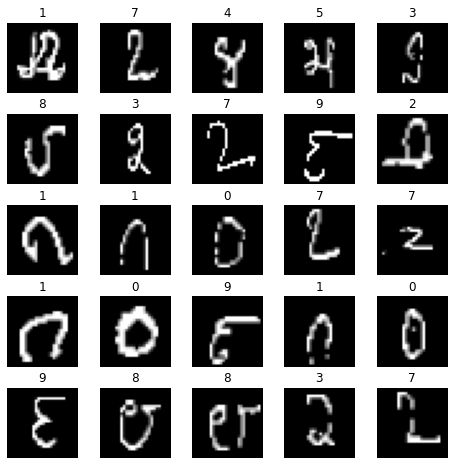

In [9]:
fig, ax = plt.subplots(5, 5, figsize=(8,8))
fig.subplots_adjust(hspace=.3)
for i in range(5):
  for j in range(5):
    ax[i][j].axis('off')
    ax[i][j].imshow(train_images.iloc[[i+(j*5)], :].to_numpy().astype(np.uint8).reshape(28,28), cmap='gray')
    ax[i][j].set_title(train_labels[i+(j*5)])

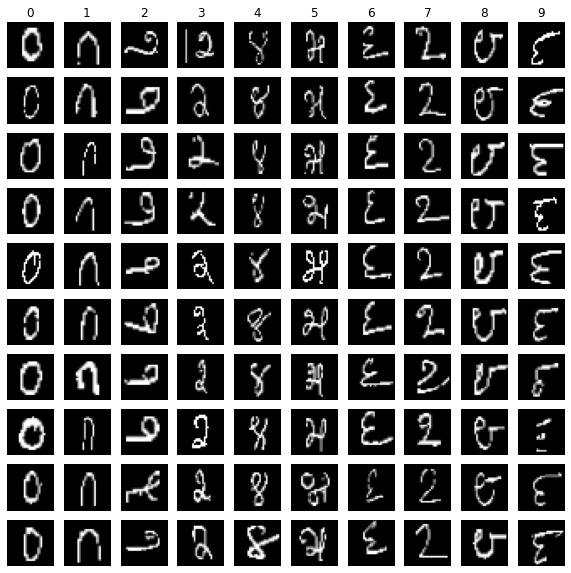

In [11]:
# 순서대로 나열 visualization
fig, ax = plt.subplots(10, 10, figsize=(10,10))

for i in range(10):
  num_i = train_images[train_labels == i]
  ax[0][i].set_title(i)
  for j in range(10):
    ax[j][i].axis('off')
    ax[j][i].imshow(num_i.iloc[j, :].to_numpy().astype(np.uint8).reshape(28, 28), cmap='gray')

In [10]:
# Transformations

img_size = 28 # size of images in MNIST
# Also the images only have one color channel
# So 3D size = (1, 28, 28)

# Transformations for the train
train_trans = transforms.Compose(([
    transforms.ToPILImage(),
    transforms.RandomCrop(img_size),
    transforms.RandomAffine(degrees=5, translate=(0.1, 0.1)),
    transforms.ToTensor(), # divides by 255
  #  transforms.Normalize((0.5,), (0.5,))
]))

# Transformations for the validation & test sets
val_trans = transforms.Compose(([
    transforms.ToPILImage(),
    transforms.ToTensor(), # divides by 255
   # transforms.Normalize((0.1307,), (0.3081,))
]))

In [11]:
class KannadaDataSet(torch.utils.data.Dataset):
    # images df, labels df, transforms
    # uses labels to determine if it needs to return X & y or just X in __getitem__
    def __init__(self, images, labels, transforms=None):
        self.X = images
        self.y = labels
        self.transforms = transforms
                    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, i):
        data = self.X.iloc[i, :] # gets the row
        # reshape the row into the image size 
        # (numpy arrays have the color channels dim last)
        data = np.array(data).astype(np.uint8).reshape(28, 28, 1) 
        
        # perform transforms if there are any
        if self.transforms:
            data = self.transforms(data)
        
        # if !test_set return the label as well, otherwise don't
        if self.y is not None: # train/val
            return (data, self.y[i])
        else: # test
            return data

In [12]:
# Get datasets using the custom Kannada MNIST Dataset for the train, val, and test images
train_set = KannadaDataSet(train_images, train_labels, train_trans)
val_set = KannadaDataSet(val_images, val_labels, val_trans)
test_set = KannadaDataSet(test_images, None, val_trans)

num_classes = 10 # 1-10

In [13]:
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        # image starts as (1, 28, 28)
        # Formula to compute size of image after conv/pool
        # (size-filter+2*padding / stride) + 1
        #                      inputs         # of filters    filter size    
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5, stride=1, padding=2) # conv1
        self.conv1_bn = nn.BatchNorm2d(num_features=32)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, stride=1, padding=2) # conv2
        self.conv2_bn = nn.BatchNorm2d(num_features=64)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels= 128, kernel_size=3, stride=1, padding=1) # conv3
        self.conv3_bn = nn.BatchNorm2d(num_features=128)
        
        self.fc1 = nn.Linear(in_features=128*6*6, out_features=1024) # linear 1
        self.fc1_bn = nn.BatchNorm1d(num_features=1024)
        self.fc2 = nn.Linear(in_features=1024, out_features=512) # linear 2
        self.fc2_bn = nn.BatchNorm1d(num_features=512)
        self.fc3 = nn.Linear(in_features=512, out_features=256) # linear 3
        self.fc3_bn = nn.BatchNorm1d(num_features=256)
        self.fc4 = nn.Linear(in_features=256, out_features=64) # linear 4
        self.fc4_bn = nn.BatchNorm1d(num_features=64)
        self.out = nn.Linear(in_features=64, out_features=10) # output
    
    def forward(self, t):
        t = F.relu(self.conv1_bn(self.conv1(t)))
        t = F.max_pool2d(t, kernel_size=2, stride=2) # (1, 14, 14)
        
        t = F.relu(self.conv2_bn(self.conv2(t)))
        t = F.max_pool2d(t, kernel_size=2, stride=2) # (1, 7, 7)
        
        t = F.relu(self.conv3_bn(self.conv3(t)))
        t = F.max_pool2d(t, kernel_size=2, stride=1) # (1, 6, 6)
        
        t = F.relu(self.fc1_bn(self.fc1(t.reshape(-1, 128*6*6))))
        t = F.relu(self.fc2_bn(self.fc2(t)))
        t = F.relu(self.fc3_bn(self.fc3(t)))
        t = F.relu(self.fc4_bn(self.fc4(t)))
        t = self.out(t)
        
        return t

In [16]:
lr = 0.001
batch_size= 100
epochs = 20

network = Network().to(device)
train_dl = DataLoader(train_set, batch_size=batch_size, shuffle=True)
val_dl = DataLoader(val_set, batch_size=batch_size, shuffle=False)
optimizer = optim.AdamW(network.parameters(), lr=5e-3, weight_decay=7.8e-2)
scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=epochs // 6, eta_min=4e-4)

for epoch in range(epochs):
  print('Epoch:', epoch+1)
  epoch_loss = 0
  epoch_correct = 0
  network.train()

  for idx, (images, labels) in enumerate(train_dl):
    X, y = images.to(device), labels.to(device)
    y_ = network(X)

    optimizer.zero_grad()  # optimizer 0 셋팅
    loss = F.cross_entropy(y_, y)  # computes the loss
    loss.backward()  # computes the gradients
    optimizer.step()  # updates weights
    scheduler.step(epoch + idx / len(train_dl))

    epoch_loss += loss.item() * batch_size
    epoch_correct += get_num_correct(y_, y)

  with torch.no_grad():
    network.eval()
    val_loss = 0
    val_correct = 0
    for images, labels in val_dl:
      X, y = images.to(device), labels.to(device)
      preds = network(X)
      loss = F.cross_entropy(preds, y)
      
      val_correct += get_num_correct(preds, y)
      val_loss = loss.item()*batch_size

  print('Val loss:', val_loss)
  print('Val Acc:', (val_correct/len(val_images))*100)

Epoch: 1
Val loss: 5.1824066787958145
Val Acc: 97.01025056947609
Epoch: 2
Val loss: 2.222607471048832
Val Acc: 98.70444191343964
Epoch: 3
Val loss: 0.8596234954893589
Val Acc: 99.25256264236903
Epoch: 4
Val loss: 5.604545399546623
Val Acc: 98.37699316628702
Epoch: 5
Val loss: 1.1852326802909374
Val Acc: 99.05324601366743
Epoch: 6
Val loss: 0.8734214119613171
Val Acc: 99.35222095671982
Epoch: 7
Val loss: 6.224523484706879
Val Acc: 98.90375854214123
Epoch: 8
Val loss: 1.1533177457749844
Val Acc: 99.08171981776765
Epoch: 9
Val loss: 0.6337052676826715
Val Acc: 99.41628701594533
Epoch: 10
Val loss: 3.7307575345039368
Val Acc: 98.07801822323462
Epoch: 11
Val loss: 1.0773380286991596
Val Acc: 99.30239179954442
Epoch: 12
Val loss: 0.6896715145558119
Val Acc: 99.44476082004556
Epoch: 13
Val loss: 1.2924647890031338
Val Acc: 98.96782460136674
Epoch: 14
Val loss: 1.4760889112949371
Val Acc: 99.30951025056947
Epoch: 15
Val loss: 2.3169031366705894
Val Acc: 99.39493166287015
Epoch: 16
Val loss: 4.

In [ ]:
# Use the validation set to make a confusion matrix

network.eval() # good habit I suppose
predictions = torch.LongTensor().to(device) # Tensor for all predictions

# Goes through the val set
for images, _ in val_dl:
    preds = network(images.to(device))
    predictions = torch.cat((predictions, preds.argmax(dim=1)), dim=0)

# Make the confusion matrix
cmt = torch.zeros(num_classes, num_classes, dtype=torch.int32)
for i in range(len(val_labels)):
    cmt[val_labels[i], predictions[i]] += 1

In [ ]:
# Time to get the network's predictions on the test set
# Put the test set in a DataLoader
test_dl = DataLoader(test_set, batch_size=batch_size, shuffle=False)

network.eval() # Safety first
predictions = torch.LongTensor().to(device) # Tensor for all predictions

# Go through the test set, saving the predictions in... 'predictions'
for images in test_dl:
    preds = network(images.to(device))
    predictions = torch.cat((predictions, preds.argmax(dim=1)), dim=0)

In [ ]:
# Read in the sample submission
submission = pd.read_csv("")
# Change the label column to our predictions 
# Have to make sure the predictions Tensor is on the cpu
submission['label'] = predictions.cpu().numpy()
# Write the dataframe to a new csv, not including the index
submission.to_csv("", index=False)